In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import Perceptron, LinearRegression, ElasticNet, BayesianRidge
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import sklearn.metrics as sm
from sklearn.tree import export_graphviz

from IPython.display import Image
import pydotplus
import os
import six
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# converts name to GW###### format for visualization purposes
def simplify_name(name):
    if str.startswith(name, "GW"):
        return "GW" + name[2:8]
    return "GW" + name[0:6]

# extracts version number from name
def extract_version(name):
    return name[-1:]

# extracts confidence from catalog.shortName
def extract_group(shortname):
    if "2.1" in shortname:
        return shortname[9:]
    return shortname[7:]

# gets confidence number of group
def extract_confidence(group):
    if group == "confident":
        return 3
    if group == "marginal":
        return 2
    if group == "auxiliary":
        return 1
    return 0

In [4]:
O3_all = pd.read_csv("../Data/GWTC-3.csv")
O3_all["simple_name"] = np.array([simplify_name(name) for name in O3_all["name"]])
O3_all["group"] = np.array([3 for _ in range(O3_all["name"].size)])
O3_all["catalog"] = np.array([extract_group(shortname) for shortname in O3_all["catalog.shortName"]])
O3_all["confidence"] = np.array([extract_confidence(group) for group in O3_all["catalog"]])
O3_all["group_name"] = np.array(["O" + str(group) for group in O3_all["group"]])
O3_all = O3_all[["name", "simple_name", "catalog", "confidence", "version", "group_name", "group", "GPS", "far", "network_matched_filter_snr", "mass_1_source", "mass_2_source", "chirp_mass_source", "redshift", "luminosity_distance"]]
O3_all = O3_all.rename(columns={"network_matched_filter_snr": "snr", "GPS": "gps", "mass_1_source": "mass1", "mass_2_source": "mass2", "chirp_mass_source": "chirp_mass", "combined_far": "far"})

In [5]:
O2_confident = pd.read_csv("../Data/GWTC-2_1-confident.csv")
O2_confident["simple_name"] = np.array([simplify_name(name) for name in O2_confident["name"]])
O2_confident["group"] = np.array([2 for _ in range(O2_confident["name"].size)])
O2_confident["group_name"] = np.array(["O" + str(group) for group in O2_confident["group"]])
O2_confident["catalog"] = np.array([extract_group(shortname) for shortname in O2_confident["catalog.shortName"]])
O2_confident["confidence"] = np.array([extract_confidence(group) for group in O2_confident["catalog"]])
O2_confident = O2_confident[["name", "simple_name", "catalog", "confidence", "version", "group_name", "group", "GPS", "far", "network_matched_filter_snr", "mass_1_source", "mass_2_source", "chirp_mass_source", "redshift", "luminosity_distance"]]
O2_confident = O2_confident.rename(columns={"network_matched_filter_snr": "snr", "GPS": "gps", "mass_1_source": "mass1", "mass_2_source": "mass2", "chirp_mass_source": "chirp_mass", "combined_far": "far"})

In [6]:
O2_marginal = pd.read_csv("../Data/GWTC-2_1-marginal.csv")
O2_marginal["simple_name"] = np.array([simplify_name(name) for name in O2_marginal["name"]])
O2_marginal["group"] = np.array([2 for _ in range(O2_marginal["name"].size)])
O2_marginal["group_name"] = np.array(["O" + str(group) for group in O2_marginal["group"]])
O2_marginal["catalog"] = np.array([extract_group(shortname) for shortname in O2_marginal["catalog.shortName"]])
O2_marginal["confidence"] = np.array([extract_confidence(group) for group in O2_marginal["catalog"]])
O2_marginal = O2_marginal[["name", "simple_name", "catalog", "confidence", "version", "group_name", "group", "GPS", "far", "network_matched_filter_snr", "mass_1_source", "mass_2_source", "chirp_mass_source", "redshift", "luminosity_distance"]]
O2_marginal = O2_marginal.rename(columns={"network_matched_filter_snr": "snr", "GPS": "gps", "mass_1_source": "mass1", "mass_2_source": "mass2", "chirp_mass_source": "chirp_mass", "combined_far": "far"})

In [7]:
O2_auxiliary = pd.read_csv("../Data/GWTC-2_1-auxiliary.csv")
O2_auxiliary["simple_name"] = np.array([simplify_name(name) for name in O2_auxiliary["name"]])
O2_auxiliary["group"] = np.array([2 for _ in range(O2_auxiliary["name"].size)])
O2_auxiliary["group_name"] = np.array(["O" + str(group) for group in O2_auxiliary["group"]])
O2_auxiliary["catalog"] = np.array([extract_group(shortname) for shortname in O2_auxiliary["catalog.shortName"]])
O2_auxiliary["confidence"] = np.array([extract_confidence(group) for group in O2_auxiliary["catalog"]])
O2_auxiliary = O2_auxiliary[["name", "simple_name", "catalog", "confidence", "version", "group_name", "group", "GPS", "far", "network_matched_filter_snr", "mass_1_source", "mass_2_source", "chirp_mass_source", "redshift", "luminosity_distance"]]
O2_auxiliary = O2_auxiliary.rename(columns={"network_matched_filter_snr": "snr", "GPS": "gps", "mass_1_source": "mass1", "mass_2_source": "mass2", "chirp_mass_source": "chirp_mass", "combined_far": "far"})

In [8]:
O1_all = pd.read_csv("../Data/GWTC-1.csv")
O1_all["simple_name"] = np.array([simplify_name(name) for name in O1_all["name"]])
O1_all["group"] = np.array([1 for _ in range(O1_all["name"].size)])
O1_all["catalog"] = np.array([extract_group(shortname) for shortname in O1_all["catalog.shortName"]])
O1_all["confidence"] = np.array([extract_confidence(group) for group in O1_all["catalog"]])
O1_all["group_name"] = np.array(["O" + str(group) for group in O1_all["group"]])
O1_all = O1_all[["name", "simple_name", "catalog", "confidence", "version", "group_name", "group", "GPS", "far", "network_matched_filter_snr", "mass_1_source", "mass_2_source", "chirp_mass_source", "redshift", "luminosity_distance"]]
O1_all = O1_all.rename(columns={"network_matched_filter_snr": "snr", "GPS": "gps", "mass_1_source": "mass1", "mass_2_source": "mass2", "chirp_mass_source": "chirp_mass", "combined_far": "far"})

In [9]:
observations = O3_all
observations = observations.append(O2_confident)
observations = observations.append(O2_marginal)
observations = observations.append(O2_auxiliary)
observations = observations.append(O1_all)

C:\Users\lucas\AppData\Local\Temp\ipykernel_488\3257666824.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  observations = observations.append(O2_confident)
C:\Users\lucas\AppData\Local\Temp\ipykernel_488\3257666824.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  observations = observations.append(O2_marginal)
C:\Users\lucas\AppData\Local\Temp\ipykernel_488\3257666824.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  observations = observations.append(O2_auxiliary)
C:\Users\lucas\AppData\Local\Temp\ipykernel_488\3257666824.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  observations = observations.append(O1_all)


In [10]:
observations["total_mass"] = observations["mass1"] + observations["mass2"]
observations["mass_ratio"] = np.abs(observations["mass1"] - observations["mass2"]) / observations["total_mass"]

observations["is_O1"] = observations["group"] == 1
observations["is_O2"] = observations["group"] == 2
observations["is_O3"] = observations["group"] == 3

Cleaned data format:<br>
**name** : full name of observation<br>
**simple_name** : simplified name of form GW######<br>
**catalog** : the catalog name of the observation<br>
**confidence** : 1. auxiliary group, 2. marginal group, 3. confident group<br>
**version** : version number of observation<br>
**group_name** : observation group the observation is from, i.e., O1, O2, O3<br>
**group** : the observation group number<br>
**gps** : the position in the LIGO raw data that the observation is found (?)<br>
**far** : (?)<br>
**snr** : signal to noise ratio<br>
**mass1 and mass2** : predicted masses of the two objects involved in the observation<br>
**chirp_mass** : chirp_mass of the two objects involved in the observation<br>
**redshift** : redshift of the obsevation<br>
**luminosity_distance** : luminosity distance of the obsevation<br>
**total_mass** : combined mass of both masses<br>
**mass_ratio** : the diffrence over sum of the two masses for the observation<br>
**is_O1** : is in O1 data<br>
**is_O2** : is in O2 data<br>
**is_O2** : is in O3 data<br>

In [11]:
confident = observations[observations['confidence'] == 3]

The confident dataframe simply has all observations that are "confident". This is needed for training because none of those observations have NaNs.

In [12]:
X = confident[["snr", "far", "chirp_mass", "total_mass", "mass_ratio"]].to_numpy()
y = np.array(confident["luminosity_distance"]).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) # spliting the data here
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

Here I am setting aside 20% of the data for testing (test_size=0.20). Typically, its recommended to use a **33/66 test-train split** (test_size=0.33) to check if the model is overfitting it's training data (i.e., to see how reliable the model is at predicting data it has never seen before), but given how little data we have the risk of the model overfitting is already so high that it requires less data to check if it is.

While I don't like having to do this, the model is already going to have a lot of trouble understanding the relationships within the data. So, by giving it more information then it would otherwise have, we are essentially **trading more uncertainity for better preformence.** If you want more specifics on why you should have a test-train split, read https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/

In [13]:
rf = RandomForestRegressor(n_estimators = 10,
                           min_samples_split = 3,
                           max_depth=4,
                           max_features = "sqrt",
                           bootstrap = True)

rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, max_features='sqrt', min_samples_split=3,
                      n_estimators=10)

In [14]:
y_test_pred = rf.predict(X_test)

print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 564.19
Mean squared error = 465539.2
Median absolute error = 520.24
Explain variance score = 0.78
R2 score = 0.77


Metrics:
- **Mean absolute error**: This is the average of absolute errors of all the data points in the given dataset.
- **Mean squared error**: This is the average of the squares of the errors of all the data points in the given dataset. It is one of the most popular metrics out there!
- **Median absolute error**: This is the median of all the errors in the given dataset. The main advantage of this metric is that it's robust to outliers. A single bad point in the test dataset wouldn't skew the entire error metric, as opposed to a mean error metric.
- **Explained variance score**: This score measures how well our model can account for the variation in our dataset. A score of 1.0 indicates that our model is perfect.
- **R2 score**: This is pronounced as R-squared, and this score refers to the coefficient of determination. This tells us how well the unknown samples will be predicted by our model. The best possible score is 1.0, but the score can be negative as well.

There discriptions where taken from https://subscription.packtpub.com/book/data/9781789808452/1/ch01lvl1sec12/computing-regression-accuracy. All this are specifically used in **regression**, i.e., when the thing your model is predicting is a number and not some categorical variable such as color, species, group, etc. This problem is a regression problem because we are trying to predict luminosity distance which can taken on a wide range of distinct values on a number line.

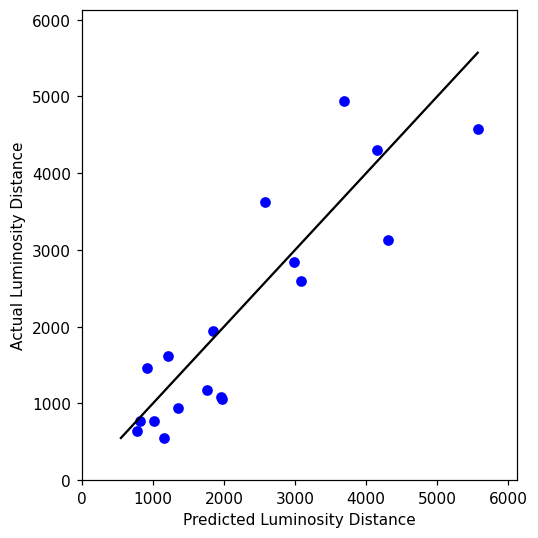

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi = 110)

ax.scatter(y_test_pred, y_test, color="blue")

min_test = [min(y_test), min(y_test_pred)]
max_test = [max(y_test), max(y_test_pred)]
x = np.linspace(min(min_test), max(max_test), 100)
ax.plot(x,x, color = "black", label = "$\\{m_1} = \\{m_2}$")

ax.set_xlim(0, max(max_test) * 1.1)
ax.set_ylim(0, max(max_test) * 1.1)

ax.set_xlabel("Predicted Luminosity Distance")
ax.set_ylabel("Actual Luminosity Distance")

plt.tight_layout()
plt.show()

Graph gives a sense of the spread of the predictions.

The spread seems resonable given just how little data there is, but obviously it's not ideal. Overall, I'm very supprised with how accurate the model is. Since it's not just spitting out random predictions there must be some relation between mass 1, mass 2, snr, far, and/or chirp mass. Unfortunitly, it seems random forest may not be able to cature this relationship that well given running it multiple times seems to get an R2 score between 0.80 and 0.90 which is not ideal.

There are a few ways to improve model preformance, but for now I want to get a sense of how well other machine learning and statistical algorthms can prefrom at this task.

Since unlike random forest, some algorthms are sensitive to unnormalized data, I will also be **normalizing** X.

In [16]:
X_scaler = MinMaxScaler()
X_norm = X_scaler.fit_transform(X)

y_scaler = MinMaxScaler()
y_norm = y_scaler.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=0.20)
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [17]:
# this method will automatically produce the above graph to compare various algorthm's performances
def visualize_preformance(nrows, ncolumns, figsize, models, model_names, model_colors, left_index, right_index):
    fig, ax = plt.subplots(nrows, ncolumns, figsize=figsize, dpi = 110)
    
    for model, name, color, li, ri in zip(models, model_names, model_colors, left_index, right_index):
        model.fit(X_train, y_train)

        y_test_scaled = y_scaler.inverse_transform(y_test.reshape(-1, 1))
        y_test_pred_unscaled = model.predict(X_test).reshape(-1, 1)
        y_test_pred = y_scaler.inverse_transform(y_test_pred_unscaled)

        r2_score = sm.r2_score(y_test, y_test_pred_unscaled)

        # graphing results
        ax[li, ri].set_title(name)

        ax[li, ri].scatter(y_test_pred, y_test_scaled, color=color)

        ax[li, ri].legend([f'r2 : {r2_score:.2f}'], loc='lower right')

        min_test = [min(y_test_scaled), min(y_test_pred)]
        max_test = [max(y_test_scaled), max(y_test_pred)]
        x = np.linspace(min(min_test), max(max_test), 100)
        ax[li, ri].plot(x,x, color = "black")

        ax[li, ri].set_xlim(0, max(max_test) * 1.1)
        ax[li, ri].set_ylim(0, max(max_test) * 1.1)

        ax[li, ri].set_xlabel("Predicted")
        ax[li, ri].set_ylabel("Actual")

    plt.tight_layout()
    plt.show()

In [18]:
# defining models

rf = RandomForestRegressor(n_estimators = 10,
                           min_samples_split = 3,
                           max_depth=4,
                           max_features = "sqrt",
                           bootstrap = True)

svr = SVR()

br = BayesianRidge()

lin_reg = LinearRegression()

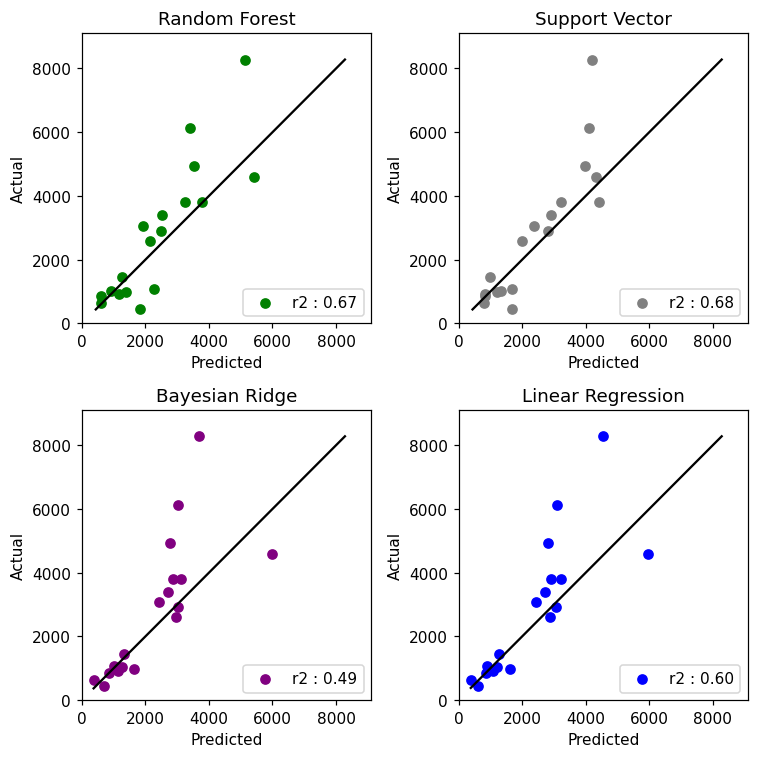

In [19]:
models = [rf, svr, br, lin_reg]
model_names = ["Random Forest", "Support Vector", "Bayesian Ridge", "Linear Regression"]
model_colors = ["green", "gray", "purple", "blue"]
left_index = [0, 0, 1, 1]
right_index = [0, 1, 0, 1]
visualize_preformance(2, 2, (7, 7), models, model_names, model_colors, left_index, right_index)

Unsuprisingly, Random Forest and Support Vector regression are clearly better.

After running this a few times I'm starting to notice **just how unreliable the predictions are for both Random Forest and Support Vector**, sometimes r2 will be 0.94, other times it will be 0.64. It's better then Bayesian Ridge and Linear Regression, but theres a long road ahead to optimize our model. It's great for the learning aspect of this, but terrable for any hope to have a working model at the end of all this.

Now that we know more about the accuracy of just throwing data into these models, its a good idea to get an idea of how these models are making their predictions. **Thankfully, one of the benifits of a random forest is it's interpretability**. All you have to do it look at it's trees.

In [20]:
feature_names = ["snr", "far", "chirp_mass", "total_mass", "mass_ratio"]
target_names = ["luminosity_distance"]

X = confident[feature_names]
y = confident["luminosity_distance"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) # spliting the data here

I'm using the unnormalized data again to train the random forest so that it's easier to understand what the individual branches within the random forest's trees are doing.

In [21]:
rf = RandomForestRegressor(n_estimators = 5,
                           min_samples_split = 3,
                           max_depth=4,
                           max_features = "sqrt",
                           bootstrap = True) 
# I'm intentially using a less powerful model with only 5 trees and a max_depth of 4 so that it is easier to interpret

rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, max_features='sqrt', min_samples_split=3,
                      n_estimators=5)

In [22]:
y_test_pred = rf.predict(X_test)

print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 780.91
Mean squared error = 1107698.55
Median absolute error = 550.45
Explain variance score = 0.34
R2 score = 0.32


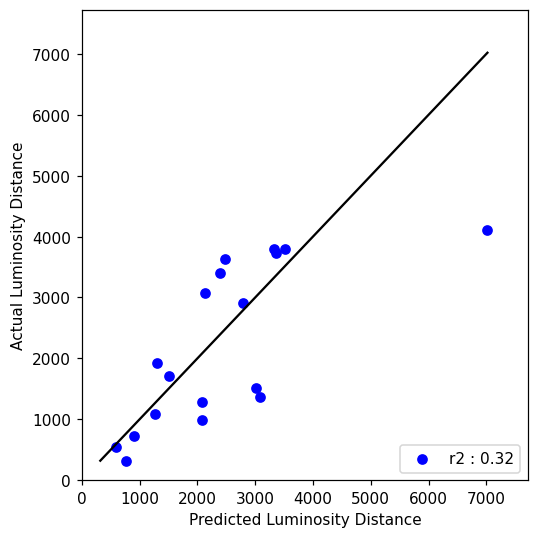

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi = 110)

ax.scatter(y_test_pred, y_test, color="blue")

min_test = [min(y_test), min(y_test_pred)]
max_test = [max(y_test), max(y_test_pred)]
x = np.linspace(min(min_test), max(max_test), 100)
ax.plot(x,x, color = "black", label = "$\\{m_1} = \\{m_2}$")

ax.legend([f'r2 : {sm.r2_score(y_test, y_test_pred):.2f}'], loc='lower right')

ax.set_xlim(0, max(max_test) * 1.1)
ax.set_ylim(0, max(max_test) * 1.1)

ax.set_xlabel("Predicted Luminosity Distance")
ax.set_ylabel("Actual Luminosity Distance")

plt.tight_layout()
plt.show()

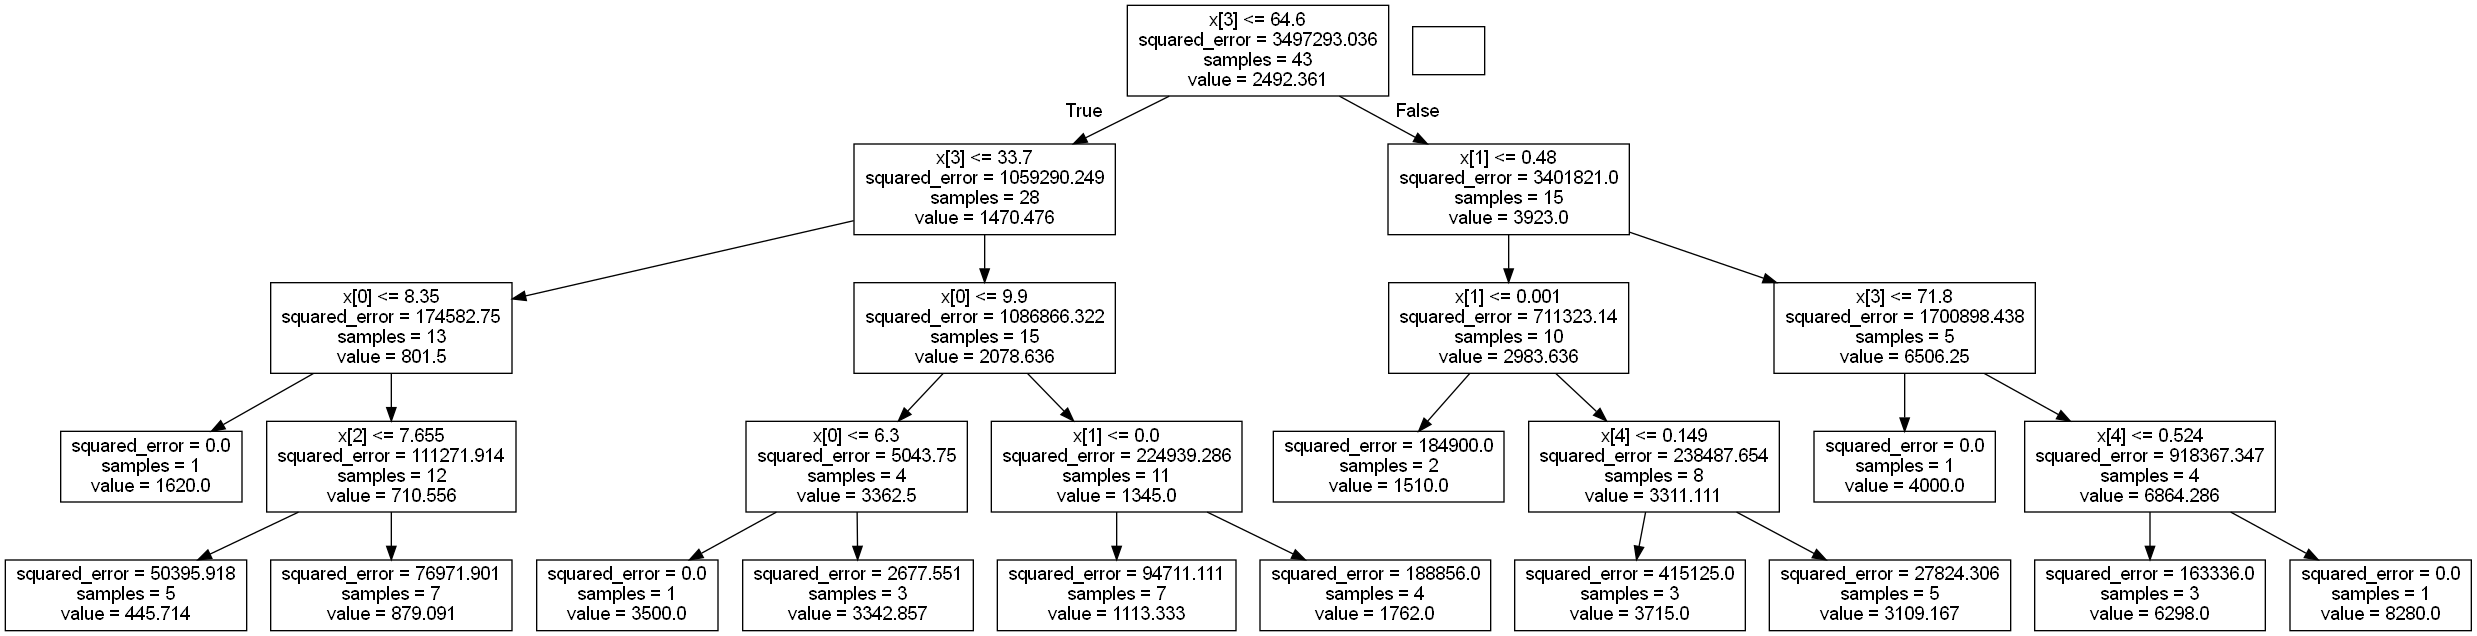

In [24]:
tree_i = 4 # allows you to set which tree you want to see

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
dot_data = six.StringIO()
export_graphviz(rf.estimators_[tree_i], out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

Running this block of code is a pain because of dependacy issues and having to install a few packages, so I recommend just commenting it out if you want to run the whole file. **To run this you need to have graphviz installed**, which is a bit of a process. Additionally, you'll need to add a graphviz as a Path variable. See https://stackoverflow.com/questions/28312534/graphvizs-executables-are-not-found-python-3-4 and for help.

Given the issues with installing it, I've created the RegressionVisualizations folder to this project which contains the generated images of all the trees in one of the random forests that where generated. **I will be using those images in the following analysis**.

**tree0**
- The **left subtree** handles low *total mass* cases (<= 38.95).
- The far left sub tree handles cases with luminosity distance (0-1000) and a very low *chirp mass* (<= 8.625). In this subtree, cases are analysed via the case's mass properties.
- The far left sub tree handles cases with luminosity distance (1000-1600) and a higher *chirp mass* (> 8.625). In this subtree, cases are analysed mostly by *snr*, however, *far* is also used.
- The **right subtree** handles high *total mass* cases (> 38.95).
- The far right sub tree handles cases with luminosity distance (1300-2800) and a high *snr* (> 10.75). In this subtree, cases are analysed by *chirp mass*, with higher *chirp masses* then being further seperated by *snr*.
- The center right sub tree handles cases with luminosity distance (1900-5650) and a low *chirp mass* (<= 10.75). In this subtree, cases are analysed by *mass ratio* and *chirp mass*.

**tree1**
- The **left subtree** handles low *chirp mass* cases (<= 14.8).
- The far left sub tree handles cases with luminosity distance (400-1500) and a lower *snr* (<= 15.25). In this subtree, cases are analysed by *chirp mass*, with low *chirp masses* then being further seperated by *total mass*.
- The far left sub tree handles cases with luminosity distance (0-600) and a higher *snr* (> 15.25). In this subtree, cases are analysed by *mass ratio*.
- The **right subtree** handles high *chirp mass* cases (> 14.8).
- The far right sub tree handles cases with luminosity distance (2000-6500) and a high *far* (> 0.001). In this subtree, cases are analysed by *far*, with lower *fars* then being further seperated by *total mass*.
- The center right sub tree handles cases with luminosity distance (900-3000) and a low *far* (<= 0.001). In this subtree, cases are analysed by *snr*, then are further sperated by *chirp mass*.

**tree2**
- The **left subtree** handles low *chirp mass* cases (<= 14.8).
- The far left sub tree handles cases with luminosity distance (0-900) and a lower *chirp mass* (<= 8.625). In this subtree, cases are analysed further by *chirp mass*, then the *snr* is used to further seperated data.
- The far left sub tree handles cases with luminosity distance (1000-1600) and a higher *chirp mass* (> 8.625). In this subtree, cases are analysed by *far*, with higher *fars* then split further by *total mass*.
- The **right subtree** handles high *chirp mass* cases (> 14.8).
- The far right sub tree handles cases with luminosity distance (1000-3400) and a high *snr* (> 7.8). In this subtree, cases are analysed by *total mass*, with higher *total masses* then being further analysed by *snr*.
- The center right sub tree handles cases with luminosity distance (3500-8250) and a low *snr* (<= 7.8). In this subtree, cases are analysed by *snr*, with higher *snrs* then being further analysed by *mass ratio*.

**Analysis**:<br>
From looking at the sample above, it seems like far and mass ratio is not having much of an impact on the results as they are rarely being used by the trees I sampled. So lets see what happens to the prediction accuracy if we remove these features.

In [25]:
def test_far_mr_hypothisis(models):
    X = confident[["snr", "far", "chirp_mass", "total_mass", "mass_ratio"]].to_numpy()
    y = np.array(confident["luminosity_distance"]).reshape(-1, 1)

    X_scaler = MinMaxScaler()
    X_norm = X_scaler.fit_transform(X)

    y_scaler = MinMaxScaler()
    y_norm = y_scaler.fit_transform(y)

    X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=0.20)
    y_train = y_train.reshape(-1)
    y_test = y_test.reshape(-1)

    # dataframes without far
    X_train_far = X_train[:,[0, 2, 3, 4]]
    X_test_far = X_test[:,[0, 2, 3, 4]]

    # dataframes without mass ratio
    X_train_mr = X_train[:,[0, 1, 2, 3]]
    X_test_mr = X_test[:,[0, 1, 2, 3]]

    # dataframes without mass ratio or far
    X_train_far_mr = X_train[:,[0, 2, 3]]
    X_test_far_mr = X_test[:,[0, 2, 3]]

    # training models
    models[0].fit(X_train, y_train)
    models[1].fit(X_train_far, y_train)
    models[2].fit(X_train_mr, y_train)
    models[3].fit(X_train_far_mr, y_train)

    # printing results
    model_tests = [X_test, X_test_far, X_test_mr, X_test_far_mr]
    model_r2 = list()
    for model, test in zip(models, model_tests):
        y_test_pred = model.predict(test)
        model_r2.append(sm.r2_score(y_test, y_test_pred))
        
    return model_r2

In [26]:
rf = RandomForestRegressor(n_estimators = 10, min_samples_split = 3, max_depth=4, max_features = "sqrt", bootstrap = True)
rf_far = RandomForestRegressor(n_estimators = 10, min_samples_split = 3, max_depth=4, max_features = "sqrt", bootstrap = True)
rf_mr = RandomForestRegressor(n_estimators = 10, min_samples_split = 3, max_depth=4, max_features = "sqrt", bootstrap = True)
rf_far_mr = RandomForestRegressor(n_estimators = 10, min_samples_split = 3, max_depth=4, max_features = "sqrt", bootstrap = True)

models = [rf, rf_far, rf_mr, rf_far_mr]

In [27]:
tests = 100

model_names = ["Base", "No Far", "No Mass Ratio", "No Far or Mass Ratio"]
results = list()
for _ in range(tests):
    results.append(test_far_mr_hypothisis(models))

results = np.array(results)
for i in range(len(model_names)):
    print(model_names[i])
    print("Average R2 score =", round(np.average(results[:, i]), 2))
    print("Median R2 score =", round(np.median(results[:, i]), 2))
    print()

Base
Average R2 score = 0.71
Median R2 score = 0.73

No Far
Average R2 score = 0.71
Median R2 score = 0.72

No Mass Ratio
Average R2 score = 0.74
Median R2 score = 0.76

No Far or Mass Ratio
Average R2 score = 0.69
Median R2 score = 0.7



It appears that the results of our test hint at the fact that **far and mass ratio have little impact on predicting luminosity distance**. Just to be safe, I want to also check this for support vector regression.

In [28]:
sv = SVR()
sv_far = SVR()
sv_mr = SVR()
sv_far_mr = SVR()

models = [sv, sv_far, sv_mr, sv_far_mr]

In [29]:
tests = 100

model_names = ["Base", "No Far", "No Mass Ratio", "No Far or Mass Ratio"]
results = list()
for _ in range(tests):
    results.append(test_far_mr_hypothisis(models))

results = np.array(results)
for i in range(len(model_names)):
    print(model_names[i])
    print("Average R2 score =", round(np.average(results[:, i]), 2))
    print("Median R2 score =", round(np.median(results[:, i]), 2))
    print()

Base
Average R2 score = 0.62
Median R2 score = 0.62

No Far
Average R2 score = 0.6
Median R2 score = 0.59

No Mass Ratio
Average R2 score = 0.74
Median R2 score = 0.75

No Far or Mass Ratio
Average R2 score = 0.72
Median R2 score = 0.73



I'm concerned that the other Mass variables also have no impact on the luminosity distance prediction, so I'm going to also going to test with no *chirp mass* or *total mass*.

In [30]:
def test_cm_tm_hypothisis(models):
    X = confident[["snr", "chirp_mass", "total_mass"]].to_numpy()
    y = np.array(confident["luminosity_distance"]).reshape(-1, 1)

    X_scaler = MinMaxScaler()
    X_norm = X_scaler.fit_transform(X)

    y_scaler = MinMaxScaler()
    y_norm = y_scaler.fit_transform(y)

    X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=0.20)
    y_train = y_train.reshape(-1)
    y_test = y_test.reshape(-1)

    # dataframes without chirp mass
    X_train_cm = X_train[:,[0, 2]]
    X_test_cm = X_test[:,[0, 2]]

    # dataframes without total mass
    X_train_tm = X_train[:,[0, 1]]
    X_test_tm = X_test[:,[0, 1]]

    # dataframes without chirp mass or total mass
    X_train_cm_tm = X_train[:,0]
    X_test_cm_tm = X_test[:,0]

    # training models
    models[0].fit(X_train, y_train)
    models[1].fit(X_train_cm, y_train)
    models[2].fit(X_train_tm, y_train)
    models[3].fit(X_train_cm_tm, y_train)

    # printing results
    model_tests = [X_test, X_test_cm, X_test_tm, X_test_cm_tm]
    model_r2 = list()
    for model, test in zip(models, model_tests):
        y_test_pred = model.predict(test)
        model_r2.append(sm.r2_score(y_test, y_test_pred))
        
    return model_r2

In [31]:
rf = RandomForestRegressor(n_estimators = 10, min_samples_split = 3, max_depth=4, max_features = "sqrt", bootstrap = True)
rf_cm = RandomForestRegressor(n_estimators = 10, min_samples_split = 3, max_depth=4, max_features = "sqrt", bootstrap = True)
rf_tm = RandomForestRegressor(n_estimators = 10, min_samples_split = 3, max_depth=4, max_features = "sqrt", bootstrap = True)
rf_cm_tm = RandomForestRegressor(n_estimators = 10, min_samples_split = 3, max_depth=4, max_features = "sqrt", bootstrap = True)

models = [rf, rf_cm, rf_tm, rf_cm_tm]

In [32]:
tests = 100

model_names = ["Base", "No Chirp Mass", "No Total Mass", "No Chirp Mass or Total Mass"]
results = list()
for _ in range(tests):
    results.append(test_far_mr_hypothisis(models))

results = np.array(results)
for i in range(len(model_names)):
    print(model_names[i])
    print("Average R2 score =", round(np.average(results[:, i]), 2))
    print("Median R2 score =", round(np.median(results[:, i]), 2))
    print()

Base
Average R2 score = 0.72
Median R2 score = 0.73

No Chirp Mass
Average R2 score = 0.72
Median R2 score = 0.73

No Total Mass
Average R2 score = 0.74
Median R2 score = 0.76

No Chirp Mass or Total Mass
Average R2 score = 0.67
Median R2 score = 0.69



That is very intresting. Unless I made an programming error or their has been some data leakage, it seems that **snr is all that is needed to predict luminosity distance**! This would have ideally been something I would want to begin with doing, but hindsight is 20/20.

So how does snr relate to luminosity distance?

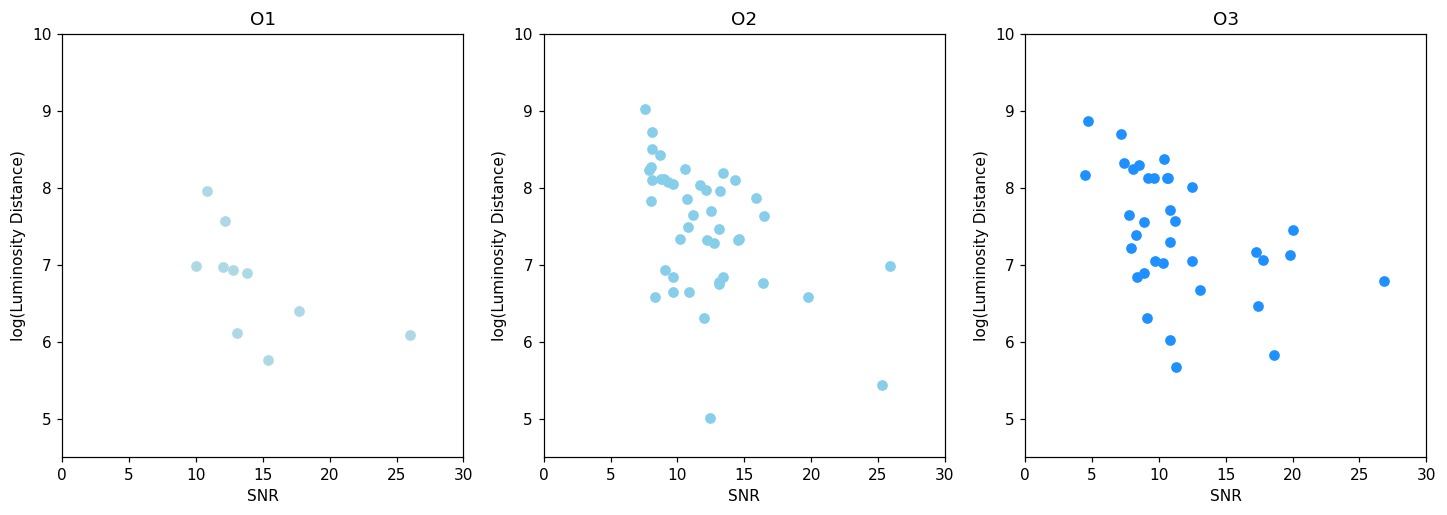

In [33]:
fig, ax = plt.subplots(1, 3, figsize=(16, 5), dpi=110)

labels = ["O1", "O2", "O3"]
colors = ["lightblue", "skyblue", "dodgerblue"]

left_index = [0,1,2]
right_index = [0,0,0]

for o, dataset_label, color, li, ri in zip(range(1, 4), labels, colors, left_index, right_index):
    snr = confident.where(confident["group"] == o)["snr"]
    log_ld = np.log(confident.where(confident["group"] == o)["luminosity_distance"])

    ax[li].scatter(snr, log_ld, color=colors[o - 1], label=labels[o - 1])

    ax[li].set_xlim(0, 30)
    ax[li].set_ylim(4.5, 10)

    ax[li].set_xlabel("SNR")
    ax[li].set_ylabel("log(Luminosity Distance)")

    ax[li].set_title(labels[o-1])

I doubt this is a problem that machine learning can be used for, maybe just chuck a neural net at the problem for shits and giggles and call it a day?

In [34]:
X = confident[["snr", "far", "chirp_mass", "total_mass", "mass_ratio"]].to_numpy()
y = np.array(confident["luminosity_distance"]).reshape(-1, 1)

X_scaler = MinMaxScaler()
X_norm = X_scaler.fit_transform(X)

y_scaler = MinMaxScaler()
y_norm = y_scaler.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=0.20)
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [35]:
mlp = MLPRegressor(hidden_layer_sizes=(5,))

mlp.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(5,))

In [36]:
y_test_pred = mlp.predict(X_test)

print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 0.2
Mean squared error = 0.07
Median absolute error = 0.17
Explain variance score = -0.15
R2 score = -0.18


As expected, no dice. There's way to little data for a neural network to have any hope at being usable. It's just going to overfit like crazy.

Maybe the problem could be statistically solved, but it doesn't appear to be solvable via machine learning unless I made a mistake somewhere.

If I can use a linear model to predict SNR accurately, maybe I can isolate the specific effects of luminosity distance on snr?

Also, what the heck is *far*?

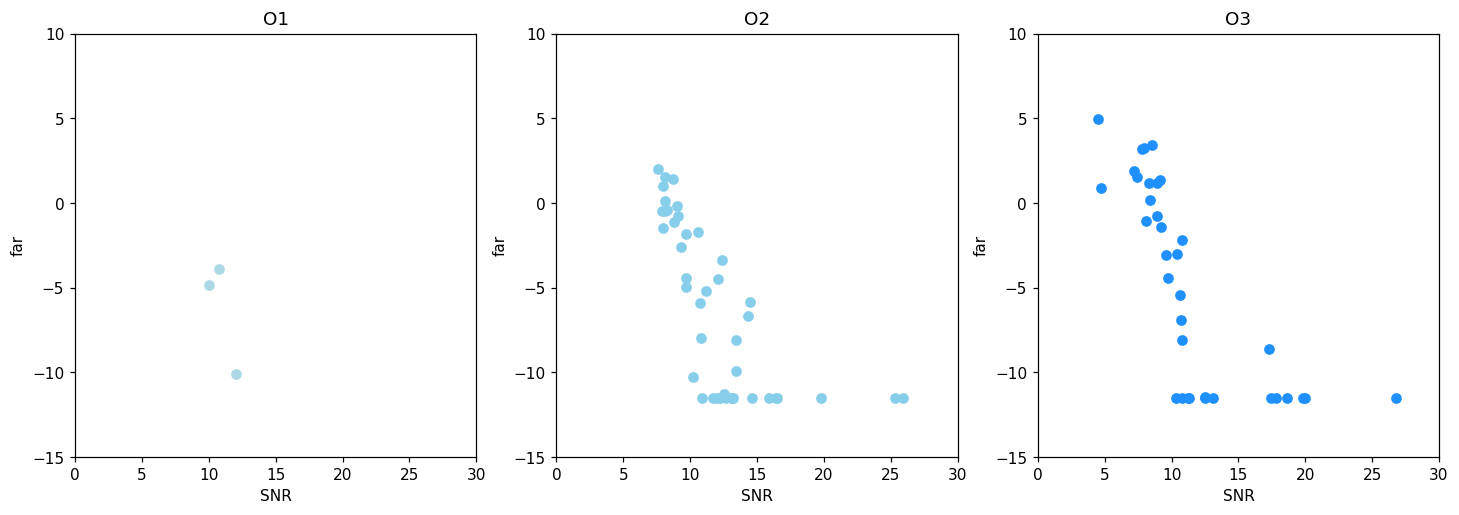

In [37]:
fig, ax = plt.subplots(1, 3, figsize=(16, 5), dpi=110)

labels = ["O1", "O2", "O3"]
colors = ["lightblue", "skyblue", "dodgerblue"]

left_index = [0,1,2]
right_index = [0,0,0]

for o, dataset_label, color, li, ri in zip(range(1, 4), labels, colors, left_index, right_index):
    snr = confident.where(confident["group"] == o)["snr"]
    far = np.log(confident.where(confident["group"] == o)["far"])

    ax[li].scatter(snr, far, color=colors[o - 1], label=labels[o - 1])

    ax[li].set_xlim(0, 30)
    ax[li].set_ylim(-15, 10)

    ax[li].set_xlabel("SNR")
    ax[li].set_ylabel("far")

    ax[li].set_title(labels[o-1])

What in the world? Far seems to have some sort of meaning in the context of signal to noise ratio.

In [38]:
X = confident[["luminosity_distance", "far", "chirp_mass", "total_mass", "mass_ratio"]].to_numpy()
y = np.array(confident["snr"]).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [39]:
rf = RandomForestRegressor(n_estimators = 20,
                           min_samples_split = 3,
                           max_depth=3,
                           max_features = "sqrt",
                           bootstrap = True) 
# I want to try to limit the depth it can use to draw inferences, and to mitigate overfitting I'm giving it more trees

rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, max_features='sqrt', min_samples_split=3,
                      n_estimators=20)

In [40]:
y_test_pred = rf.predict(X_test)

print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 2.38
Mean squared error = 14.82
Median absolute error = 1.24
Explain variance score = 0.57
R2 score = 0.54


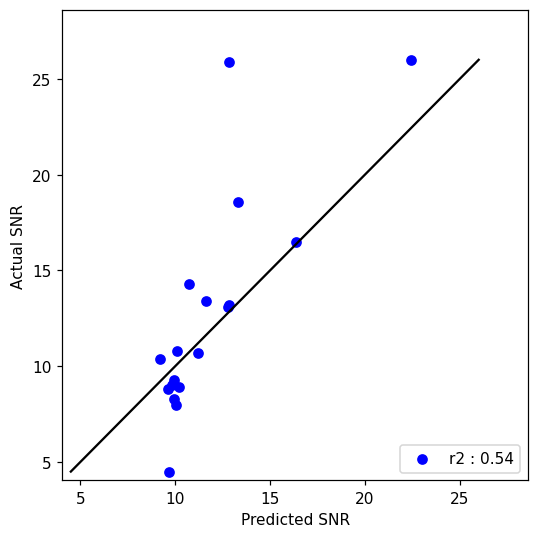

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi = 110)

ax.scatter(y_test_pred, y_test, color="blue")

min_test = [min(y_test), min(y_test_pred)]
max_test = [max(y_test), max(y_test_pred)]
x = np.linspace(min(min_test), max(max_test), 100)
ax.plot(x,x, color = "black", label = "$\\{m_1} = \\{m_2}$")

ax.legend([f'r2 : {sm.r2_score(y_test, y_test_pred):.2f}'], loc='lower right')

ax.set_xlim(min(min_test) * 0.9, max(max_test) * 1.1)
ax.set_ylim(min(min_test) * 0.9, max(max_test) * 1.1)

ax.set_xlabel("Predicted SNR")
ax.set_ylabel("Actual SNR")

plt.tight_layout()
plt.show()

While the predictions aren't the best, it sometimes works? I'll just huff some copium and say that the model can pull some sort of corrilation out of the data to predict SNR.

Running it a few times also shows that **the model is pretty decent at predicting lower valued SNRs**. If I were to guess this is because most of the data has a lower SNR.

Now if we give the random forest the specific observation group of the model, if it is able to suddenly predict SNR resonably well then in individual influnces on the value of SNR is likely just the result of LIGO's modifications between observation runs, and therefore, we would not be able to use SNR to get a resonable prediction of luminosity distance for the O4 data.

In [42]:
X = confident[["luminosity_distance", "far", "chirp_mass", "total_mass", "mass_ratio", "is_O1", "is_O2", "is_O3"]].to_numpy()
y = np.array(confident["snr"]).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [43]:
rf = RandomForestRegressor(n_estimators = 20,
                           min_samples_split = 3,
                           max_depth=3,
                           max_features = "sqrt",
                           bootstrap = True) 

rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, max_features='sqrt', min_samples_split=3,
                      n_estimators=20)

In [44]:
y_test_pred = rf.predict(X_test)

print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 2.18
Mean squared error = 7.07
Median absolute error = 1.73
Explain variance score = 0.48
R2 score = 0.48


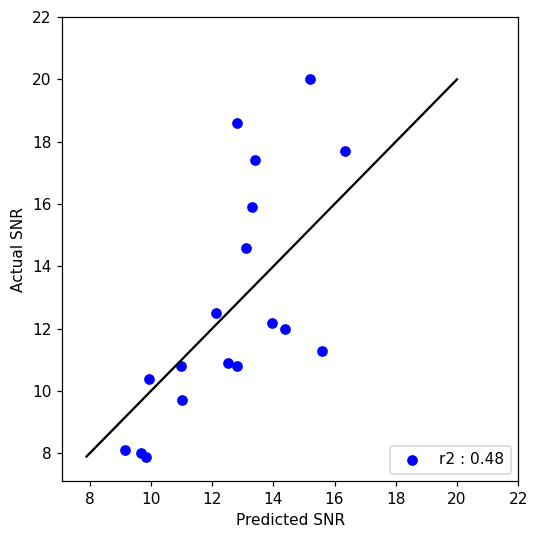

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi = 110)

ax.scatter(y_test_pred, y_test, color="blue")

min_test = [min(y_test), min(y_test_pred)]
max_test = [max(y_test), max(y_test_pred)]
x = np.linspace(min(min_test), max(max_test), 100)
ax.plot(x,x, color = "black", label = "$\\{m_1} = \\{m_2}$")

ax.legend([f'r2 : {sm.r2_score(y_test, y_test_pred):.2f}'], loc='lower right')

ax.set_xlim(min(min_test) * 0.9, max(max_test) * 1.1)
ax.set_ylim(min(min_test) * 0.9, max(max_test) * 1.1)

ax.set_xlabel("Predicted SNR")
ax.set_ylabel("Actual SNR")

plt.tight_layout()
plt.show()

**I'm not seeing enough to rule out the possibility that with is_O1, is_O2, and is_O3 added the random forest is suddenly able to predict the snr way better**. So I'll take the resonable step of running the training process a few hundred times and compare the results.

In [46]:
def test_giving_it_observation_group_hypothisis(times):
    given_results = list()
    X = confident[["luminosity_distance", "far", "chirp_mass", "total_mass", "mass_ratio", "is_O1", "is_O2", "is_O3"]].to_numpy()
    y = np.array(confident["snr"]).reshape(-1, 1)
    for _ in range(times):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
        y_train = y_train.reshape(-1)
        y_test = y_test.reshape(-1)

        rf = RandomForestRegressor(n_estimators = 20,min_samples_split = 3,max_depth=3,max_features = "sqrt",bootstrap = True) 
        rf.fit(X_train, y_train)

        y_test_pred = rf.predict(X_test)

        results = list()
        results.append(sm.mean_absolute_error(y_test, y_test_pred))
        results.append(sm.mean_squared_error(y_test, y_test_pred))
        results.append(sm.median_absolute_error(y_test, y_test_pred))
        results.append(sm.explained_variance_score(y_test, y_test_pred))
        results.append(sm.r2_score(y_test, y_test_pred))

        given_results.append(results)

    base_results = list()
    X = confident[["luminosity_distance", "far", "chirp_mass", "total_mass", "mass_ratio"]].to_numpy()
    y = np.array(confident["snr"]).reshape(-1, 1)
    for _ in range(times):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
        y_train = y_train.reshape(-1)
        y_test = y_test.reshape(-1)

        rf = RandomForestRegressor(n_estimators = 20,min_samples_split = 3,max_depth=3,max_features = "sqrt",bootstrap = True) 
        rf.fit(X_train, y_train)

        y_test_pred = rf.predict(X_test)

        results = list()
        results.append(sm.mean_absolute_error(y_test, y_test_pred))
        results.append(sm.mean_squared_error(y_test, y_test_pred))
        results.append(sm.median_absolute_error(y_test, y_test_pred))
        results.append(sm.explained_variance_score(y_test, y_test_pred))
        results.append(sm.r2_score(y_test, y_test_pred))

        base_results.append(results)

    return np.array(base_results), np.array(given_results)

In [47]:
base_results, given_results = test_giving_it_observation_group_hypothisis(1000) # I'm really not trusting these numbers, but one thousand runs should give an accurate result right?

In [48]:
print("Base Results Great Wall of Metrics")
print("Avg. mean absolute error =", round(np.average(base_results[:,0]), 2)) 
print("Median mean absolute error =", round(np.median(base_results[:,0]), 2)) 
print("Avg. Mean squared error =", round(np.average(base_results[:,1]), 2))
print("Median Mean squared error =", round(np.median(base_results[:,1]), 2))
print("Avg. Median absolute error =", round(np.average(base_results[:,2]), 2))
print("Median Median absolute error =", round(np.median(base_results[:,2]), 2)) 
print("Avg. Explain variance score =", round(np.average(base_results[:,3]), 2)) 
print("Median Explain variance score =", round(np.median(base_results[:,3]), 2)) 
print("Avg. R2 score =", round(np.average(base_results[:,4]), 2))
print("Median R2 score =", round(np.median(base_results[:,4]), 2))

print()

print("Results When Given Observation Group Metrics")
print("Avg. mean absolute error =", round(np.average(given_results[:,0]), 2)) 
print("Median mean absolute error =", round(np.median(given_results[:,0]), 2)) 
print("Avg. Mean squared error =", round(np.average(given_results[:,1]), 2))
print("Median Mean squared error =", round(np.median(given_results[:,1]), 2))
print("Avg. Median absolute error =", round(np.average(given_results[:,2]), 2))
print("Median Median absolute error =", round(np.median(given_results[:,2]), 2)) 
print("Avg. Explain variance score =", round(np.average(given_results[:,3]), 2)) 
print("Median Explain variance score =", round(np.median(given_results[:,3]), 2)) 
print("Avg. R2 score =", round(np.average(given_results[:,4]), 2))
print("Median R2 score =", round(np.median(given_results[:,4]), 2))

Base Results Great Wall of Metrics
Avg. mean absolute error = 2.19
Median mean absolute error = 2.14
Avg. Mean squared error = 11.41
Median Mean squared error = 10.61
Avg. Median absolute error = 1.38
Median Median absolute error = 1.34
Avg. Explain variance score = 0.54
Median Explain variance score = 0.56
Avg. R2 score = 0.49
Median R2 score = 0.52

Results When Given Observation Group Metrics
Avg. mean absolute error = 2.48
Median mean absolute error = 2.44
Avg. Mean squared error = 13.9
Median Mean squared error = 12.95
Avg. Median absolute error = 1.66
Median Median absolute error = 1.65
Avg. Explain variance score = 0.46
Median Explain variance score = 0.47
Avg. R2 score = 0.4
Median R2 score = 0.43


So, **being given which observation group a given data point is from does not seem to help the model predict better**.

This article helpped me get a better understanding of how to interpret the R2 score: https://statisticsbyjim.com/regression/interpret-r-squared-regression/. When R2 score is close the 1 then our model is a good predictor, but when it is 0 our model is no better then just guessing the mean for every datapoint. Thus, **the random forest can account for some of the variation in the data**, just very poorly.

Then, we have a real machine learning optimization problem. Yay! Though before celebrating we should first **check if all the features given to the model are needed**. We don't want a repeat of the above luminosity distance prediction fiasco.

There's still some weirdness going on here that I really don't like, but I'm just going to ignore my gut for now, hope, and pray.

Now that things are getting serious lets introduce **K-Fold Cross-Validation**. K-Fold Cross-Validation is a method for evaluating predictive models where a model is train and evaluated k times where k is the number of folds selected from the training dataset (basically subsets of the training data), using a diffrent fold as the validation set (a testing set) each time. Preformance metrics from each fold are averaged to estimate the models performance. While this method of evaluation is rather computationally expensive (though not in our case because there is so little data), it is a very effective method at evaluating the amount a model is overfitting or underfitting to the dataset. The three main use cases for K-Fold Cross Validation is **Model Selection**, **Parameter Tuning**, and **Feature Selection**. For more info read: https://www.analyticsvidhya.com/blog/2022/02/k-fold-cross-validation-technique-and-its-essentials/. I really should have been using this earlier, but I was being lazy ( :

In [49]:
from sklearn.model_selection import RepeatedKFold, cross_val_score

In [50]:
# returns the RMSE of a model from preforming a repeated stratified k-fold on the model
def evaluate_model(model, features = ["luminosity_distance", "far", "chirp_mass", "total_mass", "mass_ratio"], target = "snr", feature_scaler=None, target_scaler=None, n_splits=5, n_repeats=10):
    X = confident[features]
    if feature_scaler is not None:
        X = feature_scaler.fit_transform(X)

    y = confident[target]
    if target_scaler is not None:
        y = target_scaler.fit_transform(y)

    cv = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats)

    scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=cv, n_jobs=-1)

    return np.sqrt(np.mean(np.absolute(scores)))

def evaluate_model_with_groups(model, features = ["luminosity_distance", "far", "chirp_mass", "total_mass", "mass_ratio"], target = "snr", feature_scaler=None, target_scaler=None, n_splits=5, n_repeats=10):
    _features = list()
    _features.extend(features)
    _features.extend(["is_O1", "is_O2", "is_O3"])
    return evaluate_model(model=model, features=_features, target=target, feature_scaler=feature_scaler, target_scaler=target_scaler, n_splits=n_splits, n_repeats=n_repeats)

**Root Mean Squared Error** (RMSE) is a metric which tells you how well a model is able to predict actual observations. It's useful in comparing the preformance of diffrent models. To interpret it, just remember that the lower the RMSE, the better the model is able to predict actual observations.

For a demonstation of the method lets do the same comparison as previous section.

In [51]:
rf = RandomForestRegressor(n_estimators = 20, min_samples_split = 3, max_depth=3, max_features = "sqrt", bootstrap = True)

print("Without Observation Groups")
print("RMSE = ", round(evaluate_model(rf), 2))
print()

rf_given_groups = RandomForestRegressor(n_estimators = 20, min_samples_split = 3, max_depth=3, max_features = "sqrt", bootstrap = True)

print("With Observation Groups")
print("RMSE = ", round(evaluate_model_with_groups(rf_given_groups), 2))

Without Observation Groups


RMSE =  3.41

With Observation Groups
RMSE =  3.59


Now that we have this method, lets test my hypothesis that the random forest being given observation groups is only preforming worse then the one without observation groups because it does not have the depth needed to fully interpret the extra data.

I will also be doing some parameter optimization here, so it's going to take a long time to run (this is what is meant by **offsetting a lack of data by additional computation**).

In [57]:
# theres a better way to do this using a Grid Search method, but I just want to quicky write this.
depths = [2, 3, 4, 5, 6, 7]
estimators = [5, 10, 15, 20, 25, 50, 75, 100, 200]
bootstraps = [True, False]
samples_split = [2, 3, 4, 5, 6]
rf_optimization = pd.DataFrame({'n_estimators': [], 'max_depth': [], 'bootstrap': [], 'min_samples_split': [], 'without': [], 'with': []})
for n_estimators in estimators:
    for max_depth in depths:
        for bootstrap in bootstraps:
            for min_samples_split in samples_split:
                rf = RandomForestRegressor(n_estimators=n_estimators, min_samples_split=min_samples_split, max_depth=max_depth, max_features = "sqrt", bootstrap=bootstrap)

                rf_given_groups = RandomForestRegressor(n_estimators=n_estimators, min_samples_split=min_samples_split, max_depth=max_depth, max_features = "sqrt", bootstrap=bootstrap)

                rf_optimization.loc[len(rf_optimization.index)] = [n_estimators, max_depth, bootstrap, min_samples_split, evaluate_model(rf), evaluate_model_with_groups(rf_given_groups)]

C:\Users\lucas\AppData\Local\Temp\ipykernel_488\2603060728.py:14: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax[0].set_ylim(min([min(rf_optimization["without"]), min(rf_optimization["with"])]) - 0.5, max([max(rf_optimization["without"]), max(rf_optimization["with"])]) + 1, max([max(rf_optimization["without"]), max(rf_optimization["with"])]) + 0.5)
C:\Users\lucas\AppData\Local\Temp\ipykernel_488\2603060728.py:15: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax[1].set_ylim(min([min(rf_optimization["without"]), min(rf_optimization["with"])]) - 0.5, max([max(rf_optimization["without"]), max(rf_optimization["with"])]) + 1, max([max(rf_optimization["without"]), max(rf_optimization["with"])]) + 0.5)


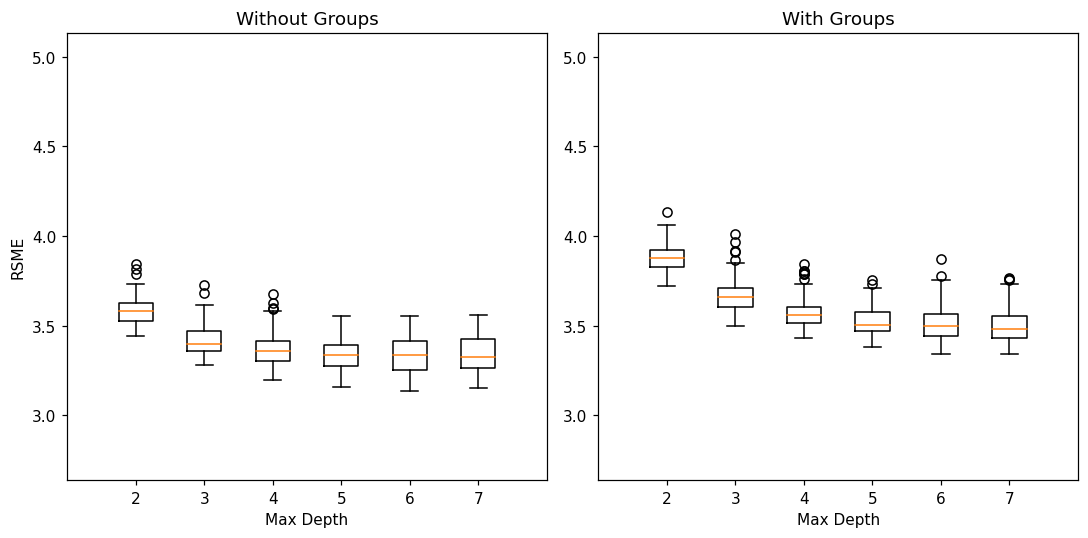

In [65]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), dpi = 110)

without_data = list()
with_data = list()
for max_depth in depths:
    without_data.append(rf_optimization[rf_optimization["max_depth"] == max_depth]["without"])
    with_data.append(rf_optimization[rf_optimization["max_depth"] == max_depth]["with"])

ax[0].boxplot(without_data, labels=depths)
ax[1].boxplot(with_data, labels=depths)

ax[0].set_xlim(0, 7)
ax[1].set_xlim(0, 7)
ax[0].set_ylim(min([min(rf_optimization["without"]), min(rf_optimization["with"])]) - 0.5, max([max(rf_optimization["without"]), max(rf_optimization["with"])]) + 0.5)
ax[1].set_ylim(min([min(rf_optimization["without"]), min(rf_optimization["with"])]) - 0.5, max([max(rf_optimization["without"]), max(rf_optimization["with"])]) + 0.5)

ax[0].set_xlabel("Max Depth")
ax[1].set_xlabel("Max Depth")
ax[0].set_ylabel("RSME")

ax[0].set_title("Without Groups")
ax[1].set_title("With Groups")

plt.tight_layout()
plt.show()

At this point it can be conclusivally be said that **Random Forest does not perform better when given the observation group of datapoints**. Theres an important caviot to this that will be explored later, because it's still possible that it will preform better when a few features are removed, but this is unlikely. But, to really be certain of this we should probably repeat this for a few diffrent machine learning algorthms.

In [83]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
gammas = ['scale', 'auto']
epsilons = [1, 0.1, 0.01, 0.001]
Cs = [1, 2, 3, 4, 5, 10, 25, 50, 75, 100]
sv_optimization = pd.DataFrame({'kernel': [], 'gamma': [], 'epsilon': [], 'C': [], 'without': [], 'with': []})
for kernel in kernels:
    for gamma in gammas:
        for epsilon in epsilons:
            for C in Cs:
                sv = SVR(kernel=kernel, gamma=gamma, epsilon=epsilon, C=C)

                sv_given_groups = SVR(kernel=kernel, gamma=gamma, epsilon=epsilon, C=C)

                sv_optimization.loc[len(sv_optimization.index)] = [kernel, gamma, epsilon, C, evaluate_model(sv, feature_scaler=MinMaxScaler()), evaluate_model_with_groups(sv_given_groups, feature_scaler=MinMaxScaler())]

**Fun Fact:** The Black Hole Algorithm (BHA) is a sophisticated hyper-parameter optimization algorithm which depicts the demeanor of Black Holes by mathematical expression and terms. It acts like there's a black hole gobbling up stars around it, with the hyper-parameters being determined by the methophorical black hole's position in the parameter space. I'm unfortunitly not using this method for my hyper-parameter optimization.

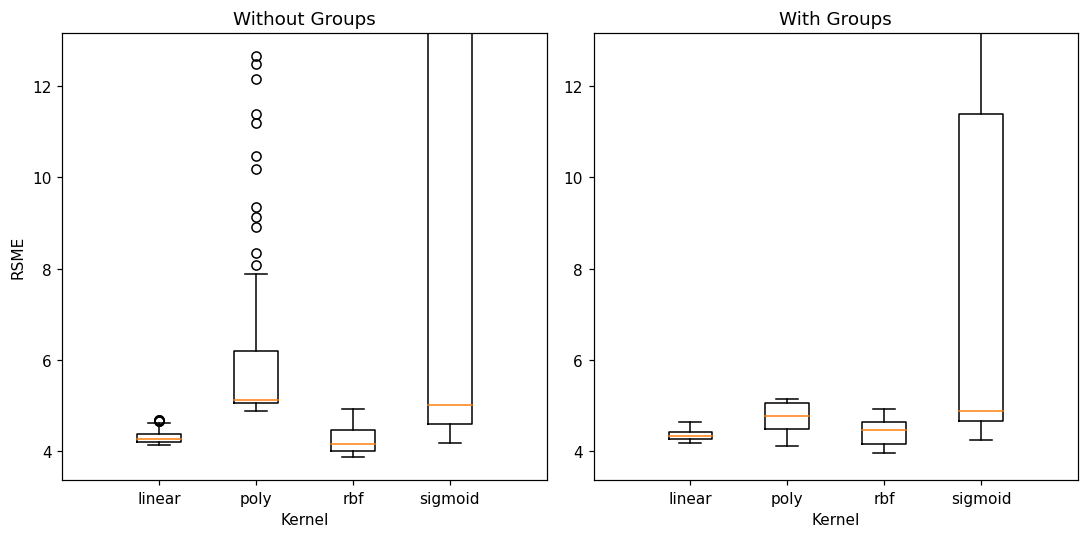

In [84]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), dpi = 110)

without_data = list()
with_data = list()
for kernel in kernels:
    without_data.append(sv_optimization[sv_optimization["kernel"] == kernel]["without"])
    with_data.append(sv_optimization[sv_optimization["kernel"] == kernel]["with"])

ax[0].boxplot(without_data, labels=kernels)
ax[1].boxplot(with_data, labels=kernels)

no_sigmoid = sv_optimization[sv_optimization["kernel"] != "sigmoid"]

ax[0].set_xlim(0, len(kernels) + 1)
ax[1].set_xlim(0, len(kernels) + 1)
ax[0].set_ylim(min([min(sv_optimization["without"]), min(sv_optimization["with"])]) - 0.5, max([max(no_sigmoid["without"]), max(no_sigmoid["with"])]) + 0.5)
ax[1].set_ylim(min([min(sv_optimization["without"]), min(sv_optimization["with"])]) - 0.5, max([max(no_sigmoid["without"]), max(no_sigmoid["with"])]) + 0.5)

ax[0].set_xlabel("Kernel")
ax[1].set_xlabel("Kernel")
ax[0].set_ylabel("RSME")

ax[0].set_title("Without Groups")
ax[1].set_title("With Groups")

plt.tight_layout()
plt.show()

C:\Users\lucas\AppData\Local\Temp\ipykernel_488\2143820235.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  no_sigmoid_poly = sv_optimization[sv_optimization["kernel"] != "sigmoid"][sv_optimization["kernel"] != "poly"]


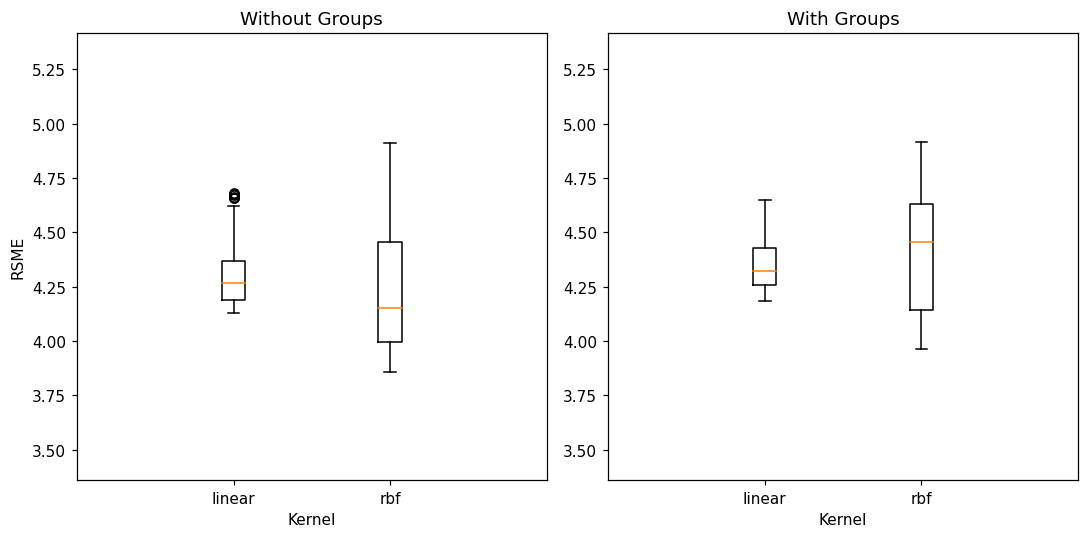

In [85]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), dpi = 110)

without_data = list()
with_data = list()
for kernel in ['linear', 'rbf']:
    without_data.append(sv_optimization[sv_optimization["kernel"] == kernel]["without"])
    with_data.append(sv_optimization[sv_optimization["kernel"] == kernel]["with"])

ax[0].boxplot(without_data, labels=['linear', 'rbf'])
ax[1].boxplot(with_data, labels=['linear', 'rbf'])

no_sigmoid_poly = sv_optimization[sv_optimization["kernel"] != "sigmoid"][sv_optimization["kernel"] != "poly"]

ax[0].set_xlim(0, len(['linear', 'rbf']) + 1)
ax[1].set_xlim(0, len(['linear', 'rbf']) + 1)
ax[0].set_ylim(min([min(no_sigmoid_poly["without"]), min(no_sigmoid_poly["with"])]) - 0.5, max([max(no_sigmoid_poly["without"]), max(no_sigmoid_poly["with"])]) + 0.5)
ax[1].set_ylim(min([min(no_sigmoid_poly["without"]), min(no_sigmoid_poly["with"])]) - 0.5, max([max(no_sigmoid_poly["without"]), max(no_sigmoid_poly["with"])]) + 0.5)

ax[0].set_xlabel("Kernel")
ax[1].set_xlabel("Kernel")
ax[0].set_ylabel("RSME")

ax[0].set_title("Without Groups")
ax[1].set_title("With Groups")

plt.tight_layout()
plt.show()

It appears then that **Support Vector Regression does not preform better when given the observation group of datapoint**. The last algorthm I want to try is Bayesian Ridge.

In [91]:
max_iters = [100, 1000, 2500, 5000]
alphas = [1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.9]
lambdas = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-9]
br_optimization = pd.DataFrame({'lambda_init': [], 'alpha_init': [], 'max_iter': [], 'without': [], 'with': []})
for lambda_init in lambdas:
    for alpha_init in alphas:
        for max_iter in max_iters:
            for C in Cs:
                br = BayesianRidge(lambda_init=lambda_init, alpha_init=alpha_init, max_iter=max_iter)

                br_given_groups = BayesianRidge(lambda_init=lambda_init, alpha_init=alpha_init, max_iter=max_iter)

                br_optimization.loc[len(br_optimization.index)] = [lambda_init, max_iter, max_iter, evaluate_model(br, feature_scaler=MinMaxScaler()), evaluate_model_with_groups(br_given_groups, feature_scaler=MinMaxScaler())]

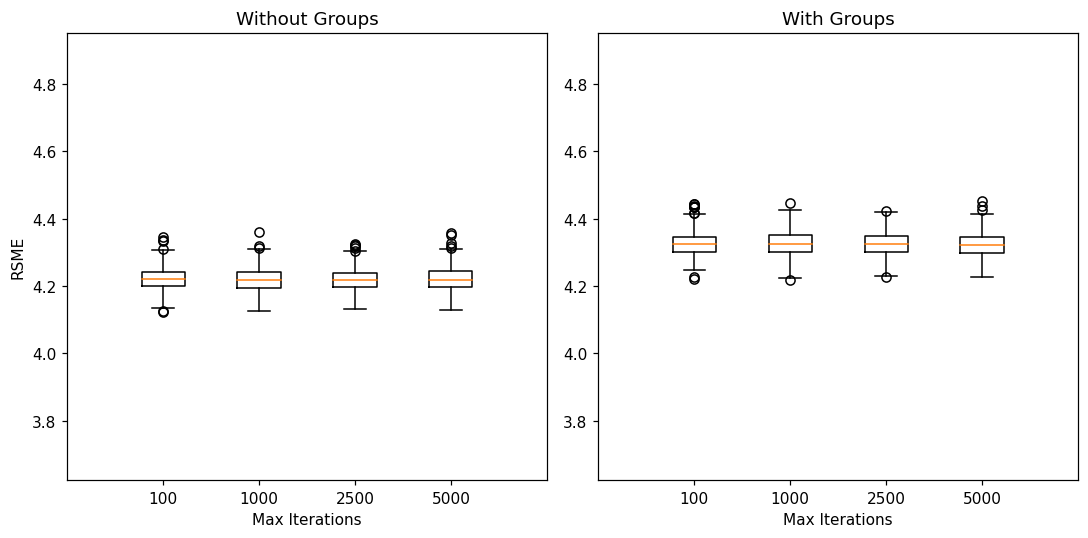

In [93]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), dpi = 110)

without_data = list()
with_data = list()
for max_iter in max_iters:
    without_data.append(br_optimization[br_optimization["max_iter"] == max_iter]["without"])
    with_data.append(br_optimization[br_optimization["max_iter"] == max_iter]["with"])

ax[0].boxplot(without_data, labels=max_iters)
ax[1].boxplot(with_data, labels=max_iters)

ax[0].set_xlim(0, len(max_iters) + 1)
ax[1].set_xlim(0, len(max_iters) + 1)
ax[0].set_ylim(min([min(br_optimization["without"]), min(br_optimization["with"])]) - 0.5, max([max(br_optimization["without"]), max(br_optimization["with"])]) + 0.5)
ax[1].set_ylim(min([min(br_optimization["without"]), min(br_optimization["with"])]) - 0.5, max([max(br_optimization["without"]), max(br_optimization["with"])]) + 0.5)

ax[0].set_xlabel("Max Iterations")
ax[1].set_xlabel("Max Iterations")
ax[0].set_ylabel("RSME")

ax[0].set_title("Without Groups")
ax[1].set_title("With Groups")

plt.tight_layout()
plt.show()

It appears then that **Bayesian Ridge does not preform better when given the observation group of datapoint**.

At this point, there are three scenarios that seem likely, 1. **a datapoint's SNR can not be more accuratly predicted using it's observation group**, 2. **we cannot accuratly predict SNR** using Luminosity Distance, Far, Chirp Mass, Total Mass, and Mass Ratio, and 3. **we do not have enough data** for any individual observation group (O1-O3) for a model to understand the SNR dynamics of individual group.

Unfortunitly, **I do not know of a way to test for scenario three**, so I will simply assume it is not the case. While we can never truly rule out 2, **the more we can improve the accuracy of our predictions, the less likely scenario 2 is the case**.

Lets begin by comparing the preformance of the three models.

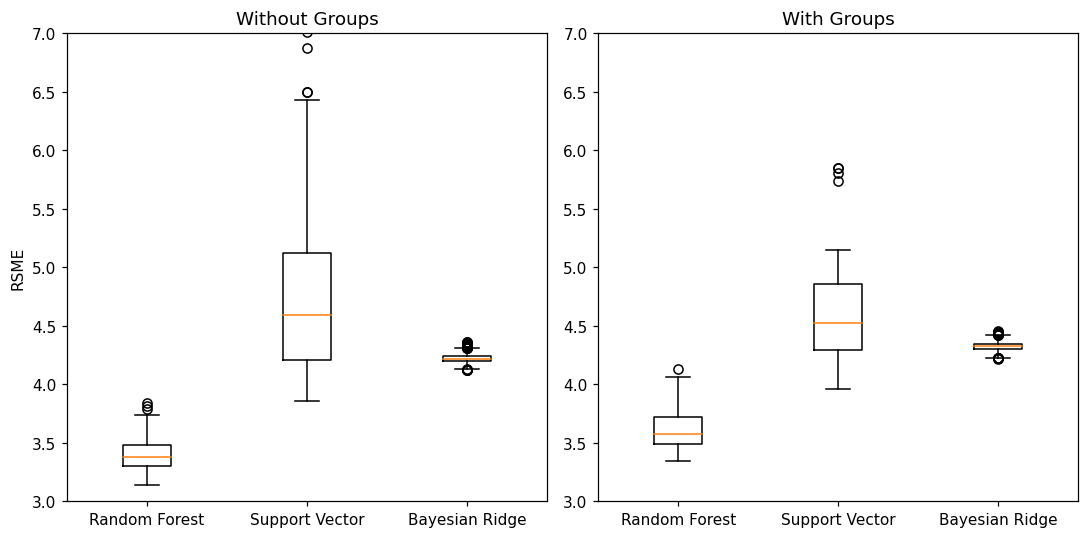

In [100]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), dpi = 110)

optimizations = [rf_optimization, sv_optimization, br_optimization]
names = ["Random Forest", "Support Vector", "Bayesian Ridge"]

without_data = list()
with_data = list()
for data in optimizations:
    without_data.append(data["without"])
    with_data.append(data["with"])

ax[0].boxplot(without_data, labels=names)
ax[1].boxplot(with_data, labels=names)

ax[0].set_xlim(0.5, len(optimizations) + 0.5)
ax[1].set_xlim(0.5, len(optimizations) + 0.5)
ax[0].set_ylim(3, 7)
ax[1].set_ylim(3, 7)

ax[0].set_ylabel("RSME")

ax[0].set_title("Without Groups")
ax[1].set_title("With Groups")

plt.tight_layout()
plt.show()

From this it seems clear that random forest is definitally the best predictor. So lets really go into the weeds when it comes to it's hyperparameter optimization to really squeeze every drop of preformace out of it.

I'm following the article https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74 in the following section.

In [170]:
from sklearn.model_selection import GridSearchCV

In [171]:
X = confident[["luminosity_distance", "far", "chirp_mass", "total_mass", "mass_ratio"]]
y = confident["snr"]

In [172]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]

# Number of features to consider at every split
max_features = [int(x) for x in np.linspace(1, 5, num = 1)]
max_features.append('log2')
max_features.append('sqrt')

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 10, num = 1)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
grid = {'n_estimators': n_estimators,
        'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'bootstrap': bootstrap}

In [173]:
rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_search = GridSearchCV(estimator = rf, param_grid = grid, cv = 5, verbose=2, n_jobs = -1)

# Fit the random search model
rf_search.fit(X, y)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, None],
                         'max_features': [1, 'log2', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157,
                                          178, 200]},
             verbose=2)

In [477]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

    print("Mean absolute error =", round(sm.mean_absolute_error(test_labels, predictions), 2)) 
    print("Mean squared error =", round(sm.mean_squared_error(test_labels, predictions), 2)) 
    print("Median absolute error =", round(sm.median_absolute_error(test_labels, predictions), 2)) 
    print("Explain variance score =", round(sm.explained_variance_score(test_labels, predictions), 2)) 
    print("R2 score =", round(sm.r2_score(test_labels, predictions), 2))
    print()
    
    return accuracy

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

base_model = RandomForestRegressor(n_estimators = 10)
base_model.fit(X_train, y_train)
print('Base')
base_accuracy = evaluate(base_model, X_test, y_test)

best_model = rf_search.best_estimator_
print('Best')
best_accuracy = evaluate(best_model, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (best_accuracy - base_accuracy) / base_accuracy))

Base
Model Performance
Average Error: 1.9270 degrees.
Accuracy = 82.91%.
Mean absolute error = 1.93
Mean squared error = 8.33
Median absolute error = 1.24
Explain variance score = 0.58
R2 score = 0.56

Best
Model Performance
Average Error: 0.9480 degrees.
Accuracy = 91.32%.
Mean absolute error = 0.95
Mean squared error = 1.73
Median absolute error = 0.69
Explain variance score = 0.91
R2 score = 0.91

Improvement of 10.14%.


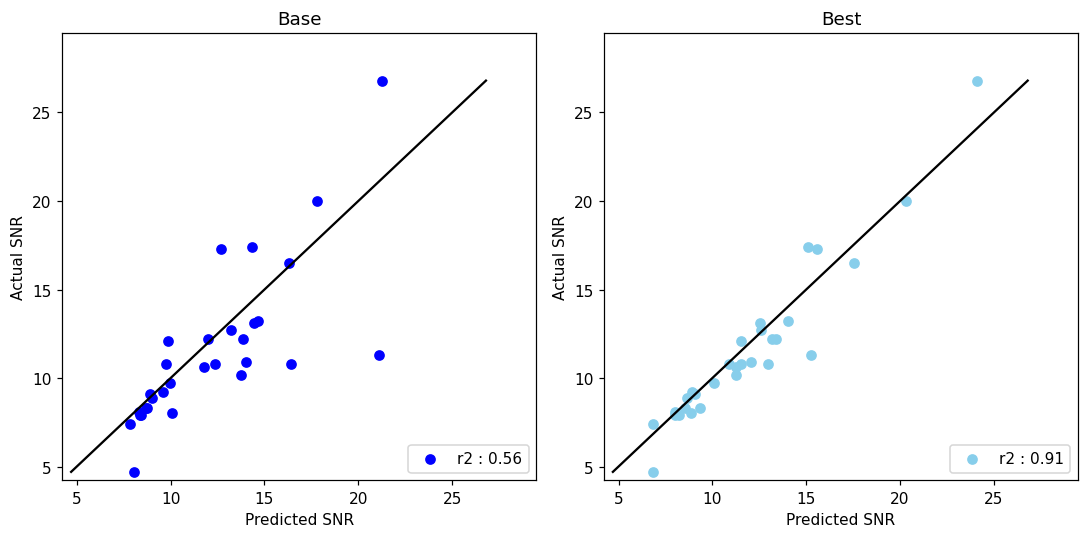

In [478]:
def plot_model_predictions(model, name, ax, color, test_features, test_labels):
    predictions = model.predict(test_features)

    ax.scatter(predictions, test_labels, color=color)

    min_test = [min(test_labels), min(predictions)]
    max_test = [max(test_labels), max(predictions)]
    x = np.linspace(min(min_test), max(max_test), 100)
    ax.plot(x,x, color = "black")

    ax.legend([f'r2 : {sm.r2_score(test_labels, predictions):.2f}'], loc='lower right')

    ax.set_xlim(min(min_test) * 0.9, max(max_test) * 1.1)
    ax.set_ylim(min(min_test) * 0.9, max(max_test) * 1.1)

    ax.set_xlabel("Predicted SNR")
    ax.set_ylabel("Actual SNR")

    ax.set_title(name)

fig, ax = plt.subplots(1, 2, figsize=(10, 5), dpi = 110)

plot_model_predictions(base_model, "Base", ax[0], "Blue", X_test, y_test)

plot_model_predictions(best_model, "Best", ax[1], "Skyblue", X_test, y_test)

plt.tight_layout()
plt.show()

Wow, That was a very significant improvement! What are the parmeters for the best model?

In [479]:
from pprint import pprint

In [480]:
print('Parameters of Best Model:\n')
pprint(best_model.get_params())

Parameters of Best Model:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 73,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


At least for the set of parameter's I'm analyzing right now, there is no max depth. So what exactly does one of the trees in this forest look like?

In [481]:
import random

In [482]:
def get_tree(i = 0):
    os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
    dot_data = six.StringIO()
    export_graphviz(best_model.estimators_[i], out_file=dot_data)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
    return Image(graph.create_png())

def sample_tree():
    os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
    dot_data = six.StringIO()
    export_graphviz(best_model.estimators_[random.randrange(0, len(best_model.estimators_))], out_file=dot_data)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png())

In [483]:
X.head()

,luminosity_distance,far,chirp_mass,total_mass,mass_ratio
0,3500.0,140.00000,15.00,49.3,0.541582
1,1120.0,0.00001,8.75,20.9,0.253589
2,1170.0,0.00001,26.60,61.9,0.105008
3,7100.0,2.40000,34.00,84.0,0.428571
4,2100.0,24.00000,17.50,43.1,0.313225


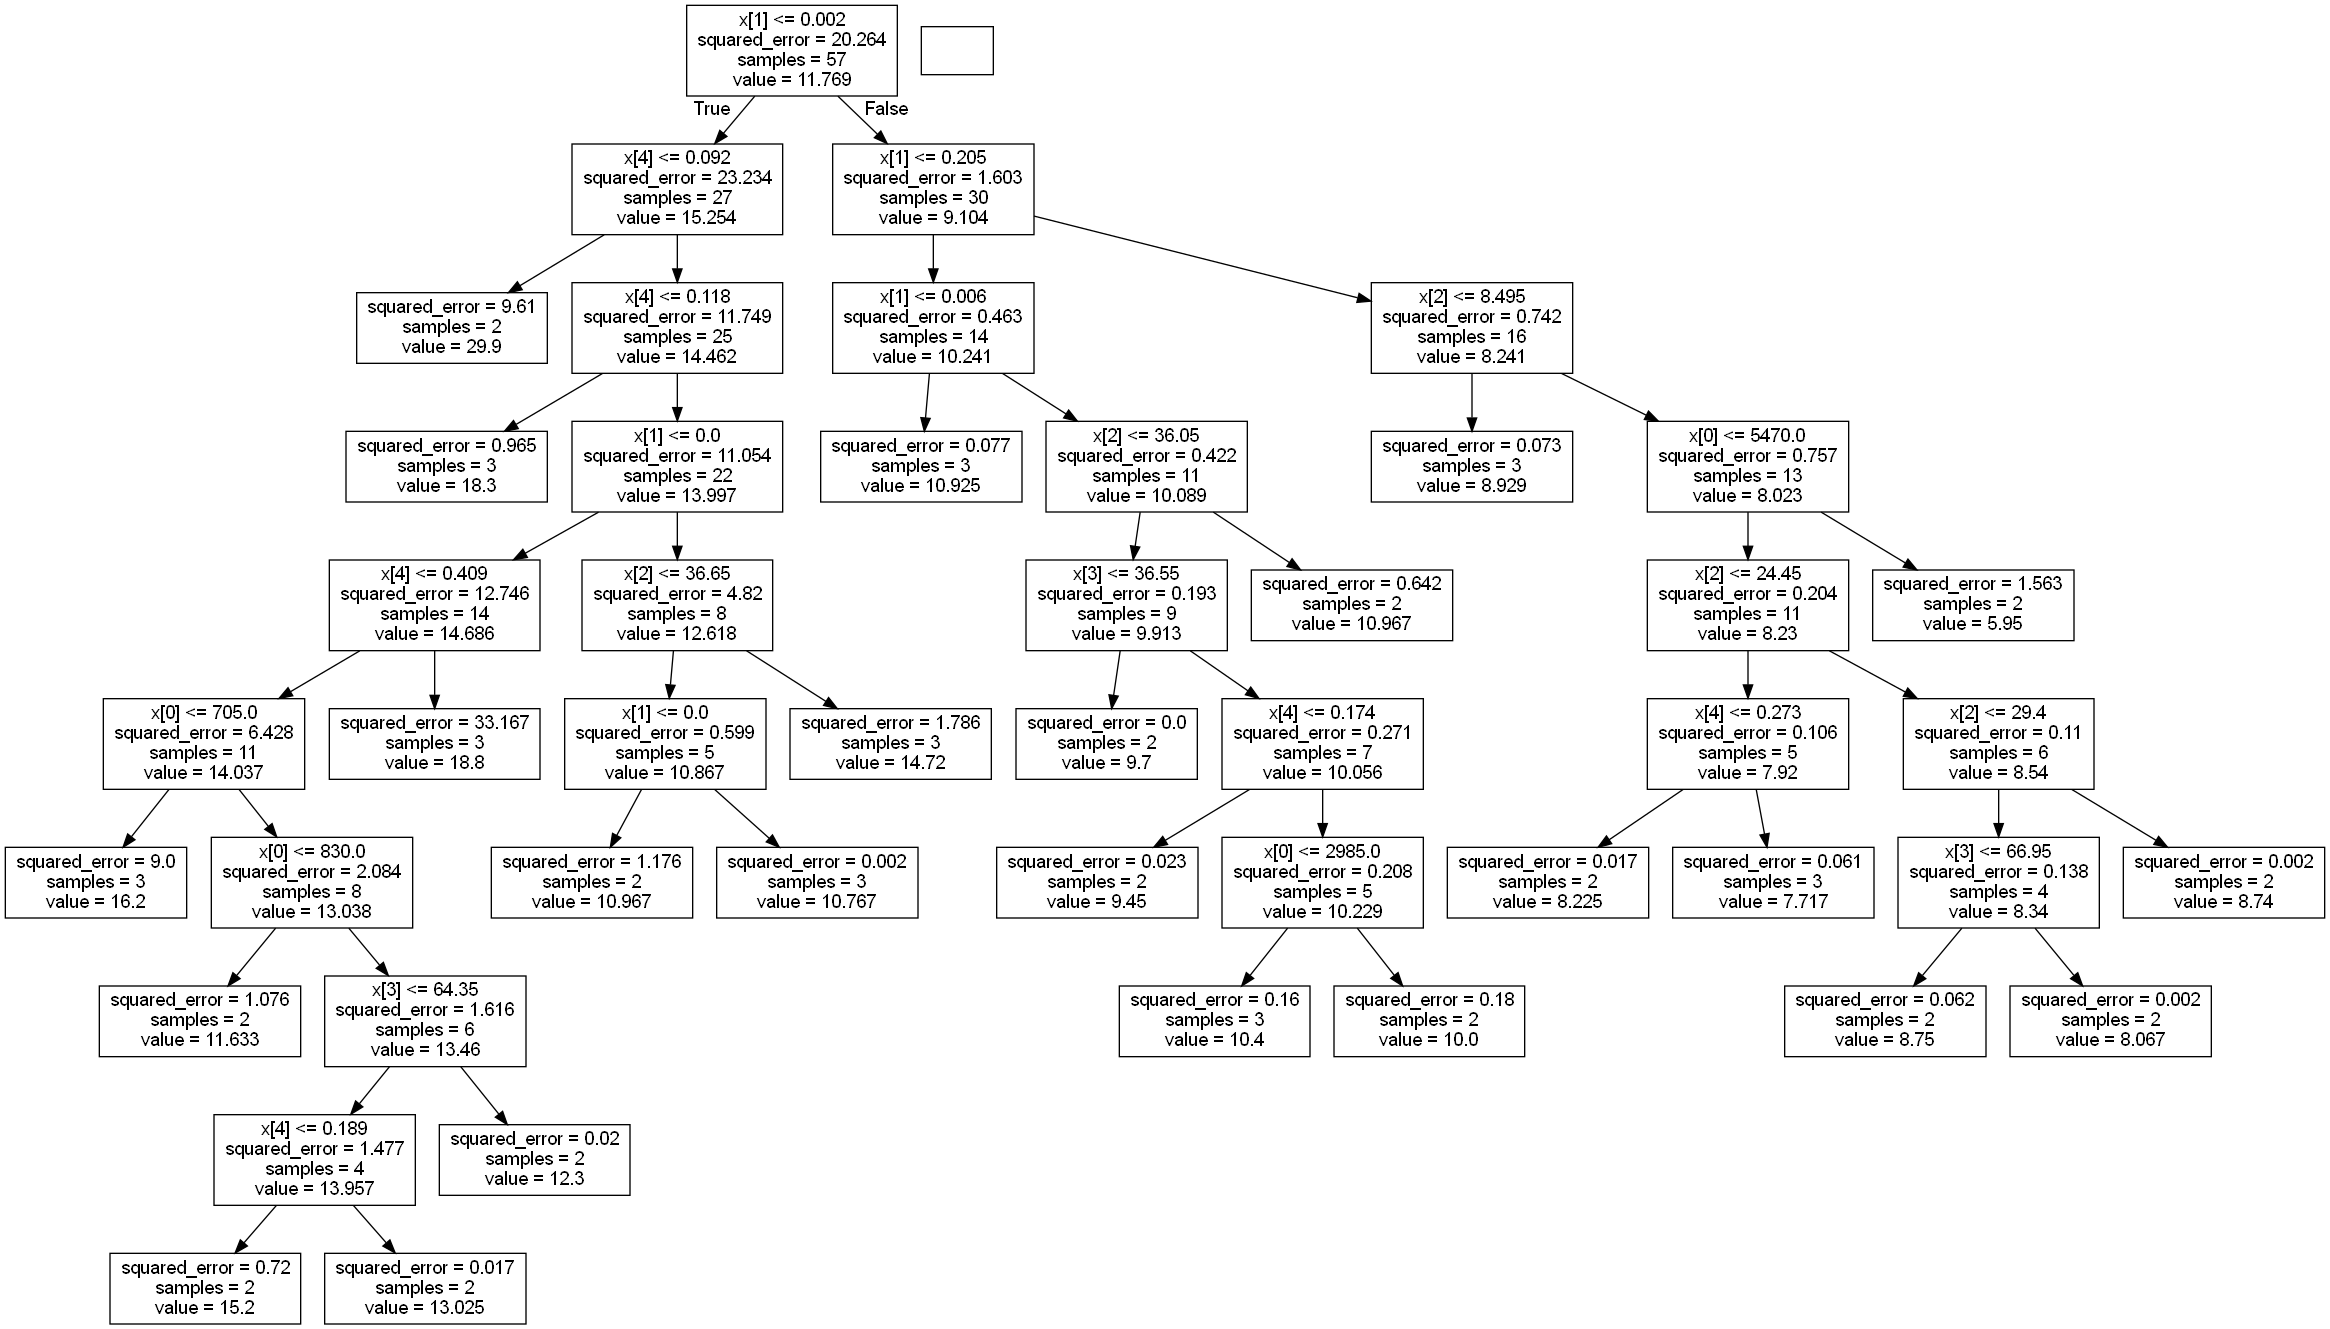

In [497]:
sample_tree()

I've saved 10 randomly sampled trees from the random forest and saved them to RegressionVisualizations\SNRTrees

I'm noticing some numbers in the trees that are seemingly repeating across diffrent trees and various random forests. This is very significant because if we can document all these numbers **we many be able to look for whatever patterns it has discovered in the graphs of various terms vs SNR**!

This may require quite a few people to fully analyze what is going on here, there are really telling patterns everywhere!